# Pyber Activity

## Analysis
- Urban drivers make up majority of the rides, then Suburban, then rural.
- Average Rural fares are higher than Urban and Suburan ride fares.
- Rural drivers should be promoted higher in order to grab higher ride fares.

In [ ]:
#Dependencies
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
import pandas as pd

In [4]:
city_file = "Raw_Data/city_data.csv"
ride_file = "Raw_Data/ride_data.csv"

In [5]:
#Read in CSV Files (Raw Data)
city_df = pd.read_csv(city_file)
ride_df = pd.read_csv(ride_file)

In [6]:
ride_df.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [7]:
city_df.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [8]:
city_data = pd.merge(ride_df, city_df, how="left", on=["city","city"])

In [9]:
city_data.head()

,city,date,fare,ride_id,driver_count,type
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038,46,Urban
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942,35,Urban
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587,55,Urban
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892,68,Urban
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673,8,Urban


## Bubble Plot of Ride Sharing Data

In [10]:
urban_group = city_data[city_data["type"] == "Urban"]
suburban_group = city_data[city_data["type"] == "Suburban"]
rural_group = city_data[city_data["type"] == "Rural"]

In [11]:
urban_count = urban_group.groupby(["city"]).count()["ride_id"]
urban_fare = urban_group.groupby(["city"]).mean()["fare"]
urban_driver = urban_group.groupby(["city"]).mean()["driver_count"]

In [12]:
suburban_count = suburban_group.groupby(["city"]).count()["ride_id"]
suburban_fare = suburban_group.groupby(["city"]).mean()["fare"]
suburban_driver = suburban_group.groupby(["city"]).mean()["driver_count"]

In [13]:
rural_count = rural_group.groupby(["city"]).count()["ride_id"]
rural_fare = rural_group.groupby(["city"]).mean()["fare"]
rural_driver = rural_group.groupby(["city"]).mean()["driver_count"]

In [35]:
plt.scatter(urban_count, 
            urban_fare, 
            marker="o", 
            facecolors="green", 
            s=urban_count*10,
            linewidth=1,
            edgecolor="black",
            label="Urban",
            alpha=0.4)

plt.scatter(suburban_count, 
            suburban_fare, 
            marker="o", 
            facecolors="yellow", 
            s=suburban_count*10,
            linewidth=1,
            edgecolor="black",
            label="Subrban",
            alpha=0.4)

plt.scatter(rural_count, 
            rural_fare, 
            marker="o", 
            facecolors="purple", 
            s=rural_count*10,
            linewidth=1,
            edgecolor="black",
            label="Rural",
            alpha=0.4)

plt.xlim(0,40)
plt.ylim(15,55)
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid(True)

legend = plt.legend(fontsize="small", 
                    numpoints=1, 
                    scatterpoints=1, 
                    title="City Types", 
                    labelspacing=1)

legend.legendHandles[0]._sizes=[25]
legend.legendHandles[1]._sizes=[25]
legend.legendHandles[2]._sizes=[25]

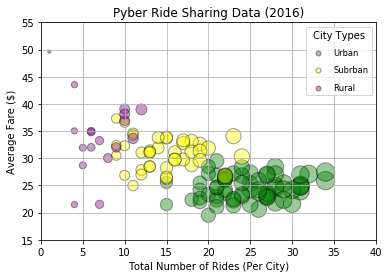

In [36]:
plt.show()

## Total Fares by City Type

In [37]:
fare_percents = city_data.groupby(["type"]).sum()["fare"] / city_data["fare"].sum() * 100
ride_percents = city_data.groupby(["type"]).sum()["ride_id"] / city_data["ride_id"].sum() * 100
driver_percents = city_data.groupby(["type"]).sum()["driver_count"] / city_data["driver_count"].sum() * 100

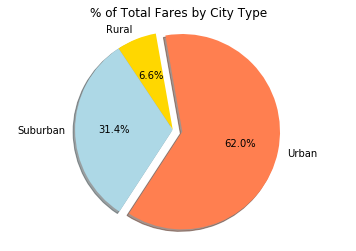

In [41]:
#% of Total Fares by City Type
labels = ["Rural","Suburban","Urban"]
colors = ["gold","lightblue","coral"]

explode = (0,0,0.1)

plt.title('% of Total Fares by City Type')

plt.pie(fare_percents, 
        autopct= '%1.1f%%', 
        explode=explode, 
        labels=labels, 
        colors=colors, 
        shadow=True, 
        startangle=100)

plt.axis("equal")
plt.show()

## Total Rides by City Type

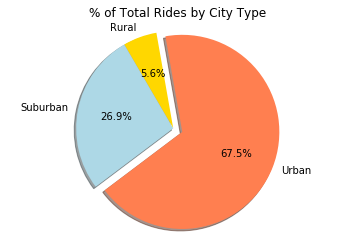

In [42]:
#% of Total Rides by City Type
labels = ["Rural","Suburban","Urban"]
colors = ["gold","lightblue","coral"]
explode = (0,0,0.1)
plt.title('% of Total Rides by City Type')

plt.pie(ride_percents, 
        autopct='%1.1f%%',
        explode=explode, 
        labels=labels, 
        colors=colors, 
        shadow=True, 
        startangle=100)

plt.axis("equal")
plt.show()

## Total Drivers by City Type

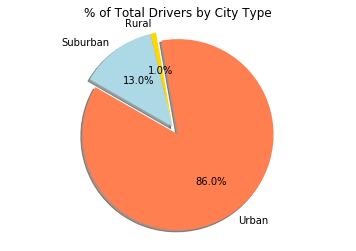

In [43]:
#% of Total Drivers by City Type
labels = ["Rural","Suburban","Urban"]
colors = ["gold","lightblue","coral"]
explode = (0,0,0.1)
plt.title('% of Total Drivers by City Type')

plt.pie(driver_percents, 
        autopct='%1.1f%%',
        explode=explode, 
        labels=labels, 
        colors=colors, 
        shadow=True, 
        startangle=100)

plt.axis("equal")
plt.show()